In [3]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import emojis

In [4]:
class EmojiCloud:
    def __init__(self, font_path='Symbola.otf'):
        self.font_path = font_path
        self.word_cloud = self.initialize_wordcloud()
        self.emoji_probability = None

        
    def initialize_wordcloud(self):
        return WordCloud(font_path=self.font_path,
                               width=2000,
                               height=1000,
                               background_color='white',
                               random_state=42,
                               collocations=False)

    
    def color_func(self, word, font_size, position, orientation, random_state=None,
                   **kwargs):
        hue_saturation = '42, 88%'

        current_emoji_probability = self.emoji_probability[word]
        if current_emoji_probability >= 0.10:
            opacity = 50
        else:
            opacity = 75 - current_emoji_probability/0.2 * 5
        return f"hsl({hue_saturation},{opacity}%)"

    def generate(self, text):
        emoji_frequencies = Counter(emojis.iter(text))
        total_count = sum(emoji_frequencies.values())
        
        self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        
        plt.figure(figsize=(20,10))
        plt.imshow(wc.recolor(color_func=self.color_func, random_state=42))
        plt.axis("off")

In [9]:
text = '😎😉😎👍📰🤪🎸🚀💫🇯🇵🧡🚀🚀🤑🌴🚘🌴🤖🤖🙋🤗💯🌍💻🥤🥤🔥🔥🔥🔥🤖🔥😂🤖👁️👁️😊🏆🥇🥉💳💳🚦🤑🌴🚘🌴🎊🎆🎈🐳🐺😍🔥🔗🎇🔥🔮🔥😀😍👁👁💰💥🍸🍸🍸🍸🍸🍸🤣😉💵💵💵🎊🎉🔥⚒️📉📉🍾🍻🤖🥳⭐️💰💾🔥🔊🏆📢🤩🎉⭐️💰😉🎁🎄🏆📢👏🏆📢🔄🎉🎉😉😎👍⚡⚡⚡⚡⚡⚡⚡⚡🔥😓🧐🙋📌👍🙄🙈🔥🏝🐬🤖🤔👀😂😂😂😂😄🎉🍾↗️✍️🎯🎯🎯🎆😂🔄💴💵🍸😂😂🔥🥶🥶💰💰💰♀️♀️🙁☹️😢😭😤😡🤬💩🖕🖕🖕😻💴💵💴🧡❓‼️💪💪🔥🙋🤑🎉💥💥🎉💥💥🔥🎇🎆🎆🎆🎆🎇🌈👋😌😌😌🤖🤖🚔🤑🌴🚘🌴🎉🎉⏳🚀💰🥳🎇🔥🎆👇💣😢💥💰🔄🎉🇭🇹😒😒😒😒♂️🤔😂🤣🔥♥♥✌️💯🙋👇👇👋👇🕒🕒🕒🕒🕒🕒🕒🕒🕒🕒🕒🎇🎆🎇🎆💰🚨🧐🤣👇🔥🎉🗺️🎉🎉💥💥💥👇😍😍😍😍💥💥💥💥💥💥💥💥💥🚀😂'


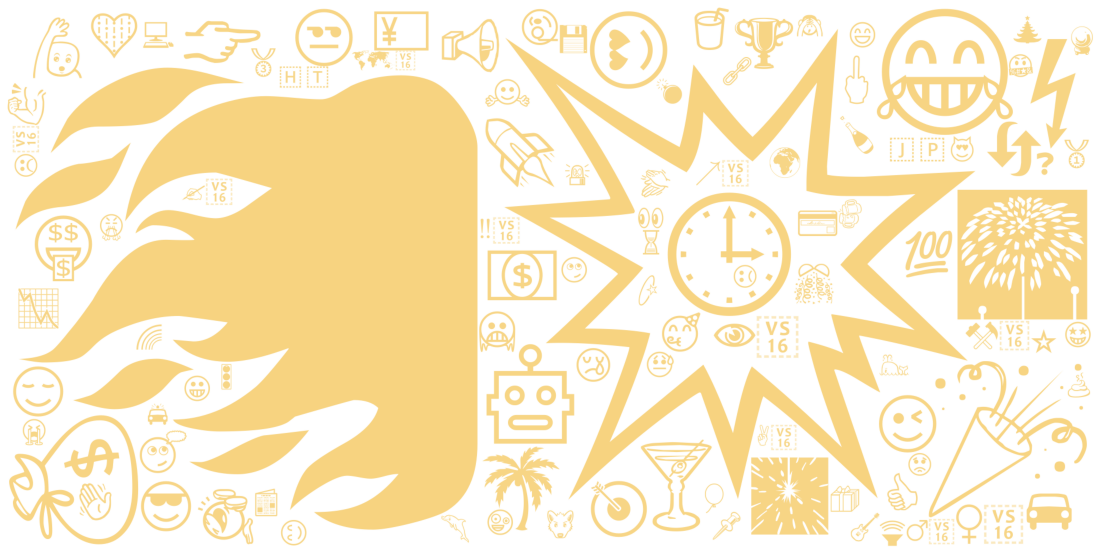

In [10]:
emoji_cloud = EmojiCloud(font_path='Symbola.otf')
emoji_cloud.generate(text)